Hello, Daniel!
My name is Olga. I'm happy to reviewing your project today.

You can find my comments in green, yellow or red boxes like this:


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Success. Everything is done succesfully.
</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Remarks. Some recommendations.
</div>


<div class="alert alert-block alert-danger">
    
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
    
Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

<b>Please don't remove my comments :)</b>

You can answer me by using this: 

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Overallv reviewer's comment</b> <a class="tocSkip"></a>
    
Daniel, thank you for sending your project. You've done a really good job on it!

While there's room for improvement, on the whole, your project is impressive good. I like your functions and code style. They are very good.  Also you additional comments and researches are pretty good. You did a great job! I am really impressed!

<span class="text-danger">There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. I wrote comments, please, check them.</span>
    
Every issue with our code is a chance for us to learn something new.

Good luck! :)
    
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    Hello Olga. <br />
    I appreciate you taking the time and commenting on the project. <br />
    Looking forward to further suggestions on how to improve any weak points I might have, thanks! 🙂
</div>

<div class="alert alert-block alert-success">
<b>Overallv reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Daniel, I really appreciate the corrections you sent in! Thanks for taking the time to do so.
    
It's clear you've put a lot of effort into it.
    
<span class="text-danger">I'm really glad to see that the project is much improved! However, this other part with LTV needs a bit more work. Could you take a second glance at it?</span>
    
When you get a moment, shoot back a second round of corrections, and I'll take a look to make sure everything is perfect. :)
    
</div>

<div class="alert alert-block alert-success">
<b>Overallv reviewer's comment. V.3.</b> <a class="tocSkip"></a>
    
Daniel, congratulations! Your project now is perfect.
    
You've done such a great job improving your project! 
    
I'm glad to say that your project has been accepted.
    
You're on the right track. Good luck!  :)
    
</div>

In [1]:
!pip install -q --user --upgrade pandas
!pip install -q --user --upgrade matplotlib
!pip install -q --user --upgrade seaborn

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [3]:
plt.rcParams["figure.figsize"] = (13, 7)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great! We have our working environment is set up!</div>

# Yandex.Afisha - Marketing analysis

This report's objective is to analyze metrics and bring insights to assist the marketing team.  
We will analyze data from June 2017 through May 2018 (1 year),  
notify on perceived issues,  
and provide possible solutions.

## Table of Contents
- [Preprocessing](#Preprocessing)
    - [Visits](#Visits)
    - [Orders](#Orders)
    - [Costs](#Prep-costs)
    - [Conclusions](#Prep-conclusions)
- [Metrics](#Metrics)
    - [Product](#Product)
        - [User activity](#User-activity)
            - [DAU - daily active users](#DAU---daily-active-users)
            - [WAU - weekly active users](#WAU---weekly-active-users)
            - [MAU - monthly active users](#MAU---monthly-active-users)
        - [Daily sessions](#Daily-sessions)
        - [ASL - average session length](#ASL---average-session-length)
        - [User loyalty - sticky factors](#User-loyalty---sticky-factors)
        - [Retention](#Retention)
            - [Weekly retention](#Weekly-retention)
            - [Monthly retention](#Monthly-retention)
    - [Sales](#Sales)
        - [Conversion cohorts](#Conversion-cohorts)  
          [Days resolution](#Conversion-cohorts---days-resolution)  
          [Minutes resolution](#Conversion-cohorts---minutes-resolution)
        - [Sales cohorts](#Sales-cohorts)
        - [Average purchase price](#Average-purchase-price)
        - [LTV - lifetime value](#LTV---lifetime-value)
    - [Marketing](#Marketing)
        - [Costs](#Marketing-costs)
        - [CTC - customer acquisition cost](#CTC---customer-acquisition-cost)
        - [ROI - return on investment](#ROI---return-on-investment)
        - [Monthly metrics](#Monthly-metrics)
        - [Ad source metrics](#Ad-source-metrics)
- [Insights](#Insights)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Very good! We have an introduction and contents. It help us to understand a project better.
</div>

## Preprocessing
***
[back](#Table-of-Contents)  

Importing a sample of each file to assess the data.  
Then importing the full data set, adjusting data types and checking for discrepancies.

- [Visits](#Visits)
- [Orders](#Orders)
- [Costs](#Prep-costs)
- [Conclusions](#Prep-conclusions)

In [4]:
def parse_csv(file, **kwargs):
    """Returns a pandas DataFrame"""
    
    filepath = f'/datasets/{file}'
    if not os.path.isfile(filepath):
        filepath = file
    
    return pd.read_csv(filepath, **kwargs)

In [5]:
def describe_df(df, na=True, unique=True, duplicates=True):
    """Prints metadata of a dataframe"""
    
    display(Markdown('Info:'))
    df.info(memory_usage=True)
    display(
        Markdown('Description:'),
        df.describe())
    
    if unique:
        try:
            display(
                df.select_dtypes(exclude='object').nunique().rename('Unique values').to_frame())
        except Exception:
            pass
    
    try:
        display(df.describe(include='object'))
    except Exception:
        pass
    
    if na:
        display(
            df.isna().sum().rename('Missing Values').to_frame())
        
    if duplicates:
        display(
            pd.DataFrame({'Duplicates': df.duplicated().rename('Duplicates').sum()}, index=['count']))

In [6]:
def parse_preview_frame(file, nrows=10, **kwargs):
    """
    Parses a preview (n rows) from the file.
    
    Returns a pandas DataFrame.
    """
    
    df = parse_csv(file, nrows=nrows, **kwargs)
    describe_df(df, na=False, unique=False, duplicates=False)
    return df

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Good functions!
</div>

#### Visits
***
[up](#Preprocessing)

In [7]:
visits_filename = 'visits_log_us.csv'
visits_preview = parse_preview_frame(visits_filename)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     10 non-null     object
 1   End Ts     10 non-null     object
 2   Source Id  10 non-null     int64 
 3   Start Ts   10 non-null     object
 4   Uid        10 non-null     uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 528.0+ bytes


Description:

,Source Id,Uid
count,10.000000,1.000000e+01
mean,4.000000,8.895634e+18
std,2.211083,6.253522e+18
min,1.000000,1.040604e+17
25%,3.000000,3.905923e+18
50%,3.500000,8.714365e+18
75%,5.000000,1.486162e+19
max,9.000000,1.687926e+19


,Device,End Ts,Start Ts
count,10,10,10
unique,2,10,10
top,desktop,2017-12-20 17:38:00,2017-12-20 17:20:00
freq,7,1,1


**actions:**  
'Device' -> category  
'End Ts' -> datetime  
'Start Ts' -> datetime  
rename columns

In [8]:
visits = parse_csv(visits_filename,
                   parse_dates=['Start Ts', 'End Ts'],
                   dtype={'Device': 'category'})
visits.columns = visits.columns.str.replace(' ','_').str.lower()
visits.rename(columns={'source_id': 'ad_source_id'}, inplace=True)

In [9]:
describe_df(visits)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   device        359400 non-null  category      
 1   end_ts        359400 non-null  datetime64[ns]
 2   ad_source_id  359400 non-null  int64         
 3   start_ts      359400 non-null  datetime64[ns]
 4   uid           359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Description:

,ad_source_id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,Unique values
device,2
end_ts,224760
ad_source_id,9
start_ts,224303
uid,228169


,Missing Values
device,0
end_ts,0
ad_source_id,0
start_ts,0
uid,0


,Duplicates
count,0


In [10]:
visits[(visits['end_ts'] < visits['start_ts'])]

,device,end_ts,ad_source_id,start_ts,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Seems to be a bug, should be reported to the data engineering team. removing entries.

In [11]:
visits = visits[~((visits['end_ts'] < visits['start_ts']))]

In [12]:
del visits_preview, visits_filename

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Sо, we have basic information about first dataset. Good changes!
</div>

#### Orders
***
[up](#Preprocessing)

In [13]:
orders_filename = 'orders_log_us.csv'
orders_preview = parse_preview_frame(orders_filename)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   10 non-null     object 
 1   Revenue  10 non-null     float64
 2   Uid      10 non-null     uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 368.0+ bytes


Description:

,Revenue,Uid
count,10.000000,1.000000e+01
mean,2.574000,1.152980e+19
std,5.158818,5.577419e+18
min,0.180000,1.074355e+18
25%,0.370000,1.034758e+19
50%,0.550000,1.204594e+19
75%,1.677500,1.563208e+19
max,17.000000,1.790368e+19


,Buy Ts
count,10
unique,9
top,2017-06-01 09:22:00
freq,2


**actions:**  
'Buy Ts' -> datetime  
rename columns

In [14]:
orders = parse_csv(orders_filename,
                   parse_dates=['Buy Ts'])
orders.columns = orders.columns.str.replace(' ','_').str.lower()

In [15]:
describe_df(orders)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Description:

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,Unique values
buy_ts,45991
revenue,1149
uid,36523


,Missing Values
buy_ts,0
revenue,0
uid,0


,Duplicates
count,0


In [16]:
del orders_preview, orders_filename

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Here all is good too. :)
</div>

<a id="Prep-costs"></a>
#### Costs
***
[up](#Preprocessing)

In [17]:
costs_filename = 'costs_us.csv'
costs_preview = parse_preview_frame(costs_filename)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  10 non-null     int64  
 1   dt         10 non-null     object 
 2   costs      10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


Description:

,source_id,costs
count,10.0,10.000000
mean,1.0,50.707000
std,0.0,12.490226
min,1.0,36.530000
25%,1.0,40.440000
50%,1.0,49.120000
75%,1.0,56.967500
max,1.0,75.200000


,dt
count,10
unique,10
top,2017-06-01
freq,1


**actions:**  
'dt' -> datetime  
rename columns

In [18]:
costs = parse_csv(costs_filename,
                   parse_dates=['dt'])
costs.rename(columns={'dt': 'date'}, inplace=True)

In [19]:
describe_df(costs)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Description:

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


,Unique values
source_id,7
date,364
costs,2396


,Missing Values
source_id,0
date,0
costs,0


,Duplicates
count,0


In [20]:
del costs_preview, costs_filename

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
And here. :)
</div>

#### Datasets' Timespan

In [21]:
display(
    *[globals()[name] \
      .rename_axis(name, axis=1) \
      .describe(include='datetime', datetime_is_numeric=True).loc[['min', 'max'], :] 
      for name in ['visits', 'orders', 'costs']])

visits,end_ts,start_ts
min,2017-06-01 00:02:00,2017-06-01 00:01:00
max,2018-06-01 01:26:00,2018-05-31 23:59:00


orders,buy_ts
min,2017-06-01 00:10:00
max,2018-06-01 00:02:00


costs,date
min,2017-06-01 00:00:00
max,2018-05-31 00:00:00


In [22]:
display(
    visits[visits['start_ts'] >= '2018-06-01'],
    orders[orders['buy_ts'] >= '2018-06-01'],
    costs[costs['date'] >= '2018-06-01'])

,device,end_ts,ad_source_id,start_ts,uid


,buy_ts,revenue,uid
50414,2018-06-01 00:02:00,3.42,83872787173869366


,source_id,date,costs


A single transaction is placed outside the timespan of other datasets.  
It will interfere with future analysis (cohorts) and is therefore removed.

In [23]:
orders = orders[orders['buy_ts'] < '2018-06-01']

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great research about data. :)
</div>

<a id="Prep-conclusions"></a>
### Conclusions
***
[up](#Preprocessing)

Imported relevant datasets.  
Adjusted mostly datetime columns (and a single categorical column).  
No missing values found.  
No duplicates found.  
Removed a single entry from the orders dataset, in order to comply with other datasets' time spans.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
So, we studied our datasets and ready to analyze! :) 
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Also we need to check missing and duplicate values. Yes, here we do not have them. But it would be good to do it automatically.
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    describe_df() displays missing values, added duplicates to it as well. <br />
    If it is not visible enough, perhaps I should think about different approach as to how to present the preprocessing data.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Imagine that we have 50 datasets. It would be hard to check all duplicatesand nulls by describe. We can lost something.
    
Here we can use describe(), only 3 datasets is good. For your future projects at job it would be better to use other checking. You can write a function, which used checking and return something like: no nulls and duplicates. :)    
</div>

## Metrics
***
[back](#Table-of-Contents)

- [Product](#Product)
    - [User activity](#User-activity)
        - [DAU - daily active users](#DAU---daily-active-users)
        - [WAU - weekly active users](#WAU---weekly-active-users)
        - [MAU - monthly active users](#MAU---monthly-active-users)
    - [Daily sessions](#Daily-sessions)
    - [ASL - average session length](#ASL---average-session-length)
    - [User loyalty - sticky factors](#User-loyalty---sticky-factors)
    - [Retention](#Retention)
        - [Weekly retention](#Weekly-retention)
        - [Monthly retention](#Monthly-retention)
- [Sales](#Sales)
    - [Conversion cohorts](#Conversion-cohorts)  
      [Days resolution](#Conversion-cohorts---days-resolution)  
      [Minutes resolution](#Conversion-cohorts---minutes-resolution)
    - [Sales cohorts](#Sales-cohorts)
    - [Average purchase price](#Average-purchase-price)
    - [LTV - lifetime value](#LTV---lifetime-value)
- [Marketing](#Marketing)
    - [Costs](#Marketing-costs)
    - [CAC - customer acquisition cost](#CAC---customer-acquisition-cost)
    - [ROI - return on investment](#ROI---return-on-investment)
    - [Monthly metrics](#Monthly-metrics)
    - [Ad source metrics](#Ad-source-metrics)

In [24]:
def samples(dataframes=['visits', 'orders', 'costs', 'data', 'cohorts']):
    """Utility function. Prints a row from each dataframe imported."""

    # display(*[globals()[name].sample(1).rename_axis(name, axis=1) for name in dataframes])
    
    for name in dataframes:
        try:
            display(globals()[name].sample(1).rename_axis(name, axis=1))
        except Exception:
            pass

### Product
***
[up](#Metrics)

- [User activity](#User-activity)
    - [DAU - daily active users](#DAU---daily-active-users)
    - [WAU - weekly active users](#WAU---weekly-active-users)
    - [MAU - monthly active users](#MAU---monthly-active-users)
- [Daily sessions](#Daily-sessions)
- [ASL - average session length](#ASL---average-session-length)
- [User loyalty - sticky factors](#User-loyalty---sticky-factors)
- [Retention](#Retention)
    - [Weekly retention](#Weekly-retention)
    - [Monthly retention](#Monthly-retention)

In [25]:
def plot_lines(points=[], ax=None, **kwargs):
    """Plots horizontal / vertical lines, and annotates them."""
    
    if not points:
        return
    
    if not ax:
        ax = plt.gca()
        
    for point in points:
        p = point.pop('p', None)
        t = point.pop('type', None)
        text = point.pop('text', None)
        
        if t == 'h':
            ax.axhline(p, **point, **kwargs)
        elif t == 'v':
            ax.axvline(p, **point, **kwargs)
        
        if text:
            ax.text(*text)

In [26]:
def plot_bar_values(ax, func=None):
    """Plots bars height annotation."""
    
    for rect in ax.patches:
        height = rect.get_height()
        text = f'{height:,.0f}' if not callable(func) else func(height)
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, text, ha='center', va='bottom')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Good functions too. :)
</div>

#### User activity
***
[up](#Product)

User activity is determined by unique visitors.

- [DAU - daily active users](#DAU---daily-active-users)
- [WAU - weekly active users](#WAU---weekly-active-users)
- [MAU - monthly active users](#MAU---monthly-active-users)

In [27]:
samples()

visits,device,end_ts,ad_source_id,start_ts,uid
1141,desktop,2017-12-12 19:35:00,4,2017-12-12 19:32:00,15467596040468276962


orders,buy_ts,revenue,uid
10273,2017-10-03 11:48:00,0.61,1217449152691268102


costs,source_id,date,costs
527,2,2017-11-12,119.54


In [28]:
# obsolete code from previous submission, left as documentation
# visits['session_year']  = visits['start_ts'].dt.year
# visits['session_month'] = visits['start_ts'].dt.month
# visits['session_week']  = visits['start_ts'].dt.isocalendar().week

In [29]:
visits['session_date']  = visits['start_ts'].dt.date.astype('datetime64')
visits['session_month'] = visits['session_date'].astype('datetime64[M]')
visits['session_week'] = (
    visits['session_date']
    - pd.to_timedelta(visits['session_date'].dt.dayofweek, unit='d'))

display(
    visits.dtypes,
    visits.sample())

device                 category
end_ts           datetime64[ns]
ad_source_id              int64
start_ts         datetime64[ns]
uid                      uint64
session_date     datetime64[ns]
session_month    datetime64[ns]
session_week     datetime64[ns]
dtype: object

,device,end_ts,ad_source_id,start_ts,uid,session_date,session_month,session_week
56901,desktop,2018-02-28 20:45:00,3,2018-02-28 20:42:00,10276155489889560763,2018-02-28,2018-02-01,2018-02-26


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Here we have 2017 and 2018 years. It would be better to use .astype('datetime64[M]') for month. :)
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    I agree with you. <br />
    This is how it was done on the online platform lessons, so I have tried to do it in a similar way. <br />
    Now I'm confident it's not as good for this purpose, so I've changed it.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
It is not an error, only for more convenient code. :)

</div>

#### DAU - daily active users
***
[up](#User-activity)

In [30]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
dau_mean = int(dau.mean())
display(Markdown(f'There were {dau_mean:,} daily active users on average.'))

There were 907 daily active users on average.

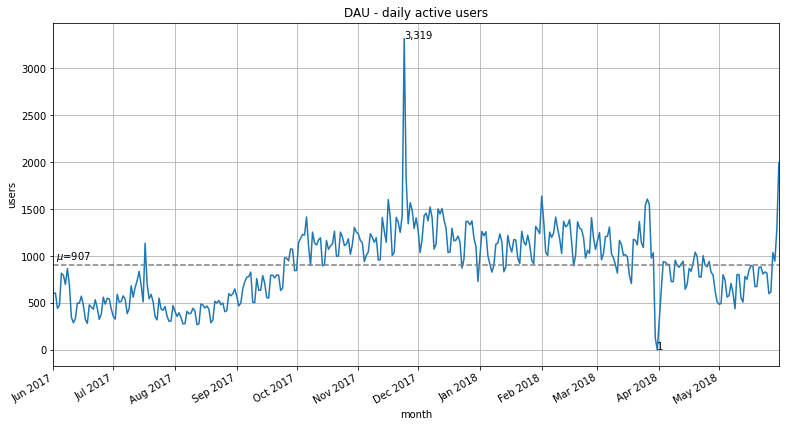

In [31]:
months = list(dau.reset_index()['session_date'].astype('datetime64[M]').dt.strftime('%b %Y').unique())
p1 = dau.nlargest(1, 'uid')
p2 = dau.nsmallest(1, 'uid')

dau.plot(title='DAU - daily active users', legend='')
plt.xticks(months, months)
plt.xlabel('month')
plt.ylabel('users')

plot_lines(
    points=[
        {'p': dau_mean, 'type': 'h', 'text': [plt.xticks()[0][0] + 1.2, dau_mean + 60, f'$\mu$={dau_mean:,}']},
        {'text': [p1.index[0], p1.iloc[0,0], f'{p1.iloc[0,0]:,}']},
        {'text': [p2.index[0], p2.iloc[0,0], f'{p2.iloc[0,0]:,}']},
    ],
    color='grey',
    linestyle='--')

plt.margins(x=0)
plt.grid()
plt.show()

There is a peak of activity just before Dec 2017,  
and a drop just before Aug 2018 (1 unique visitor, which looks like an anomaly.  Should look into that).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Yes, our number is 907 and it is not bad number. :)
</div>

#### WAU - weekly active users
***
[up](#User-activity)

In [32]:
wau = visits.groupby('session_week').agg({'uid': 'nunique'})
wau_mean = int(wau.mean())
display(Markdown(f'There were {wau_mean:,} weekly active users on average.'))

There were 5,716 weekly active users on average.

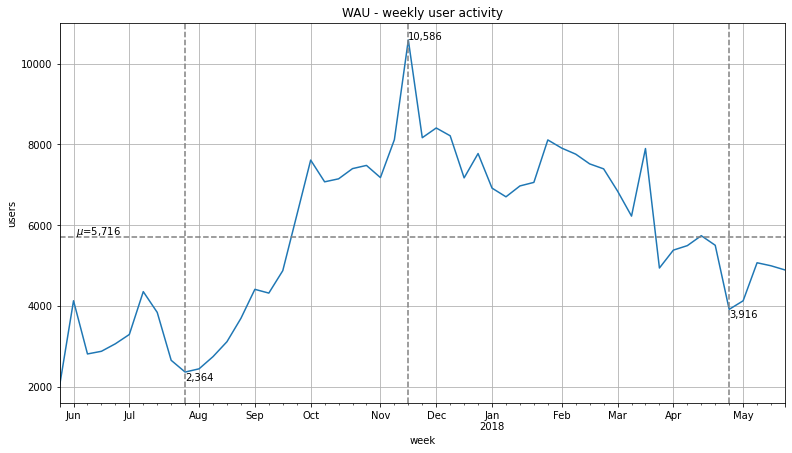

In [33]:
p1 = wau.nsmallest(2, 'uid')[-1:]
p2 = wau.nlargest(1, 'uid')
p3 = wau[wau.index.year == 2018].nsmallest(1, 'uid')[-1:]

wau.plot(title='WAU - weekly user activity', legend='')
plt.xlabel('week')
plt.ylabel('users')

plot_lines(
    points=[
        {'p': wau_mean, 'type': 'h', 'text': [plt.xticks()[0][0] + 1.2, wau_mean + 60, f'$\mu$={wau_mean:,}']},
        {'p': p1.index[0], 'type': 'v', 'text': [p1.index[0], p1.iloc[0,0] - 200, f'{p1.iloc[0,0]:,}']},
        {'p': p2.index[0], 'type': 'v', 'text': [p2.index[0], p2.iloc[0,0], f'{p2.iloc[0,0]:,}']},
        {'p': p3.index[0], 'type': 'v', 'text': [p3.index[0], p3.iloc[0,0] - 200, f'{p3.iloc[0,0]:,}']},
    ],
    color='grey',
    linestyle='--')

plt.margins(x=0)
plt.grid()
plt.show();

Weekly active users resembles daily resolution, only less jagged (smoother).  
There's a generally growing trend up until a peak at the middle of December 2017,  
and a decreasing trend since then.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Right number and graph!
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~Please, add a conclusion for WAU. :)~</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    Added conclusion (plus some graph goodies :)
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Thank you! Graph goodies are great! We can see more details! :) 
</div>

#### MAU - monthly active users
***
[up](#User-activity)

In [34]:
mau = visits.groupby('session_month').agg({'uid': 'nunique'})
mau_mean = int(mau.mean())
display(Markdown(f'There were {mau_mean:,} monthly active users on average.'))

There were 23,228 monthly active users on average.

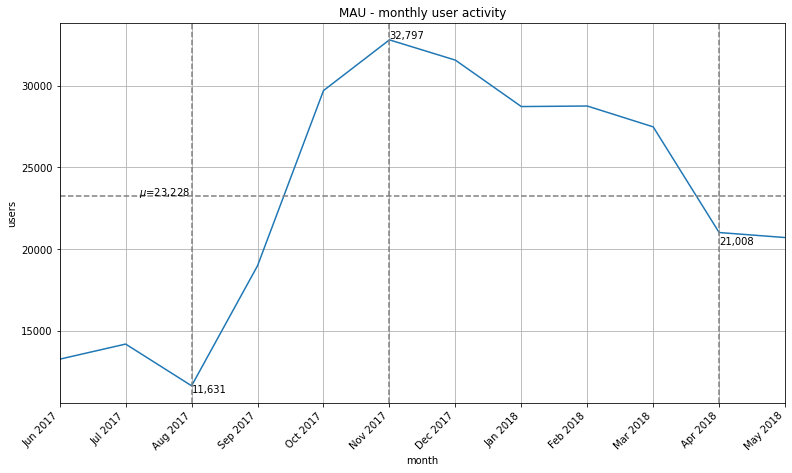

In [35]:
p1 = mau.nsmallest(1, 'uid')
p2 = mau.nlargest(1, 'uid')
p3 = mau[mau.index.year == 2018].nsmallest(2, 'uid')[-1:]

mau.plot(title='MAU - monthly user activity', legend='')
plt.xticks(months, months, rotation=45, ha='right')
plt.xlabel('month')
plt.ylabel('users')

# mean
# plt.axhline(mau_mean, color='grey', linestyle='--')
# plt.text(plt.xticks()[0][0], mau_mean + 60, f'$\mu$={mau_mean:,}')

plot_lines(
    points=[
        {'p': mau_mean, 'type': 'h', 'text': [plt.xticks()[0][0] + 1.2, mau_mean + 60, f'$\mu$={mau_mean:,}']},
        {'p': p1.index[0], 'type': 'v', 'text': [p1.index[0], p1.iloc[0,0] - 400, f'{p1.iloc[0,0]:,}']},
        {'p': p2.index[0], 'type': 'v', 'text': [p2.index[0], p2.iloc[0,0] + 100, f'{p2.iloc[0,0]:,}']},
        {'p': p3.index[0], 'type': 'v', 'text': [p3.index[0], p3.iloc[0,0] - 700, f'{p3.iloc[0,0]:,}']},
    ],
    color='grey',
    linestyle='--')

plt.margins(x=0)
plt.grid()
plt.show();

We have a drop in activity at Aug 2017, and a peak of activity at Nov 2017.  
Seasonality might be the culprit here.  
It's safe to assume that people prefer summer activities, and their usage increases towards the peak of the holiday season.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Yes, you are right! How do you think why?
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    Added a possible explanation to the graph.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Well done! :)

</div>

#### Daily sessions
***
[up](#Product)

In [36]:
daily_sessions = (visits.groupby('session_date')
                  .agg({'start_ts': 'count', 'uid': 'nunique'})
                  .rename(columns={'start_ts': 'sessions', 'uid': 'unique'}))
daily_sessions['sessions_per_user'] = daily_sessions['sessions'] / daily_sessions['unique']
daily_sessions.head()

,sessions,unique,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [37]:
display(Markdown(f"There were {int(daily_sessions['sessions'].mean()):,} daily sessions on average,<br />"
                 f"{int(daily_sessions['unique'].mean()):,} unique sessions,<br />"
                 f"and {daily_sessions['sessions_per_user'].mean():.2f} sessions per (unique) user."))

There were 987 daily sessions on average,<br />907 unique sessions,<br />and 1.08 sessions per (unique) user.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done!
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Please, add a daily sessions for unique client. :)</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    Changed 'count' to 'nunique'.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
To calculate sessions per user(unique) we should:
    
- group by session date and use for uid count and nunique.
- divide number of sessions (count) on users(nunique).
    
Please, change your code a litle. :) 
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.2</b> <a class="tocSkip"></a> <br />
    Updated.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Very good!Now we know that we have 1 session per (unique) user. Not so much. 
</div>

#### ASL - average session length
***
[up](#Product)

In [38]:
sessions_duration = (visits['end_ts'] - visits['start_ts']).dt.seconds

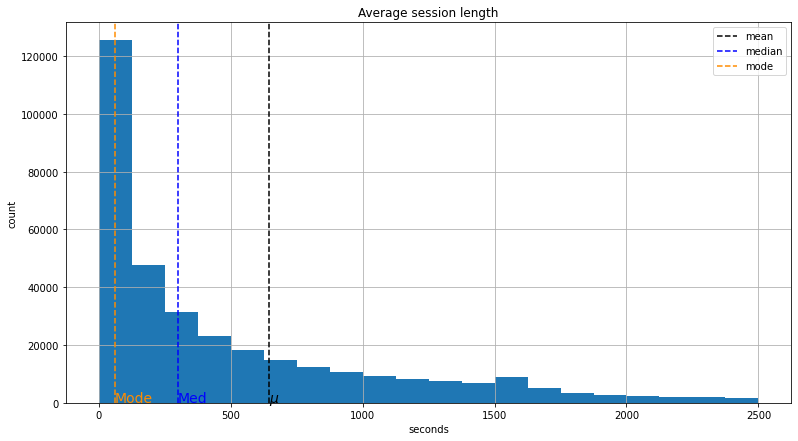

In [39]:
sessions_duration.hist(bins=20, range=(0, 2_500))
plt.title("Average session length")
plt.xlabel('seconds')
plt.ylabel('count')


sessions_stats = {
    'mean': (sessions_duration.mean(), '$\mu$', 'black'),
    'median': (sessions_duration.median(), 'Med', 'blue'),
    'mode': (sessions_duration.mode()[0], 'Mode', 'darkorange')
}

for name, (stat, text, color) in sessions_stats.items():
    plt.axvline(stat, color=color, linestyle='--', label=name)
    plt.annotate(text, (stat, 100), fontsize=14, color=color)
    
plt.legend()

plt.show();

The distribution is positively skewed, using Mode to determine most common value.  
\* Median and Mean give a wrong result, which does not represent the average sesson length - since the distribution is not normal.

In [40]:
seconds = sessions_duration.mode()[0]
Markdown('Average session length was {} seconds ({:.0f} minute).' \
         .format(seconds, seconds/60))

Average session length was 60 seconds (1 minute).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Yes, we have very fast client! </div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Also we can check mean and median and compare them with mode. </div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    Added relevant comparison.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
We can see intresting results!
</div>

#### User loyalty - sticky factors
***
[up](#Product)

In [41]:
sticky_wau = float(dau.mean() / wau.mean())
display(Markdown(f'{sticky_wau:.1%} of users come back on a weekly basis.'))

15.9% of users come back on a weekly basis.

In [42]:
sticky_mau = float(dau.mean() / mau.mean())
display(Markdown(f'{sticky_mau:.1%} of users come back on a monthly basis.'))

3.9% of users come back on a monthly basis.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for sticky factors!
</div>

#### Retention
***
[up](#Product)

- [Weekly retention](#Weekly-retention)
- [Monthly retention](#Monthly-retention)

In [43]:
samples()

visits,device,end_ts,ad_source_id,start_ts,uid,session_date,session_month,session_week
195421,desktop,2017-10-09 18:32:00,4,2017-10-09 18:28:00,14059255018136425246,2017-10-09,2017-10-01,2017-10-09


orders,buy_ts,revenue,uid
16182,2017-11-05 09:17:00,1.1,14122385807125735271


costs,source_id,date,costs
588,2,2018-01-12,149.57


In [44]:
visits_data = (visits[['uid', 'session_date']]
                     .join(
                         visits.groupby('uid')['session_date'].min().rename('first_session_date'),
                         on='uid')
                     .reset_index(drop=True))

visits_data.sample()

,uid,session_date,first_session_date
75532,8682426961845784832,2017-11-24,2017-07-04


In [45]:
visits_data['session_week'] = (
    visits_data['session_date']
    - pd.to_timedelta(visits_data['session_date'].dt.dayofweek, unit='d'))

visits_data['first_session_week'] = (
    visits_data['first_session_date']
    - pd.to_timedelta(visits_data['first_session_date'].dt.dayofweek, unit='d'))

visits_data.sample()

,uid,session_date,first_session_date,session_week,first_session_week
340575,15135279648254870104,2017-09-18,2017-09-18,2017-09-18,2017-09-18


#### Weekly retention
***
[up](#Retention)

In [46]:
weekly_cohorts = visits_data.copy()
weekly_cohorts['cohort_lifetime'] = (
    (weekly_cohorts['session_week'] - weekly_cohorts['first_session_week'])
    / np.timedelta64(1, 'W')
).round().astype('int')

weekly_cohorts.sample()

,uid,session_date,first_session_date,session_week,first_session_week,cohort_lifetime
87777,5599048030526707311,2018-02-06,2017-07-17,2018-02-05,2017-07-17,29


In [47]:
weekly_cohorts = (weekly_cohorts
                  .groupby(['first_session_week', 'cohort_lifetime'])
                  .agg({'uid': 'nunique'})
                  .rename(columns={'uid': 'users'})
                  .reset_index())

weekly_cohorts.sample()

,first_session_week,cohort_lifetime,users
518,2017-08-07,33,20


In [48]:
weekly_initial_users = (weekly_cohorts.query('cohort_lifetime == 0')
                        [['first_session_week', 'users']]
                       .rename(columns={'users': 'initial_users'}))
weekly_cohorts = weekly_cohorts.merge(weekly_initial_users, on='first_session_week')

weekly_cohorts.sample()

,first_session_week,cohort_lifetime,users,initial_users
1096,2017-12-04,16,37,6027


In [49]:
weekly_cohorts['retention'] = weekly_cohorts['users'] / weekly_cohorts['initial_users']
weekly_cohorts.sample()

,first_session_week,cohort_lifetime,users,initial_users,retention
711,2017-09-11,21,47,3501,0.013425


In [50]:
weekly_retention = weekly_cohorts.pivot_table(
    index='first_session_week',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')
weekly_retention.index = weekly_retention.index.strftime('%Y-%m-%d')

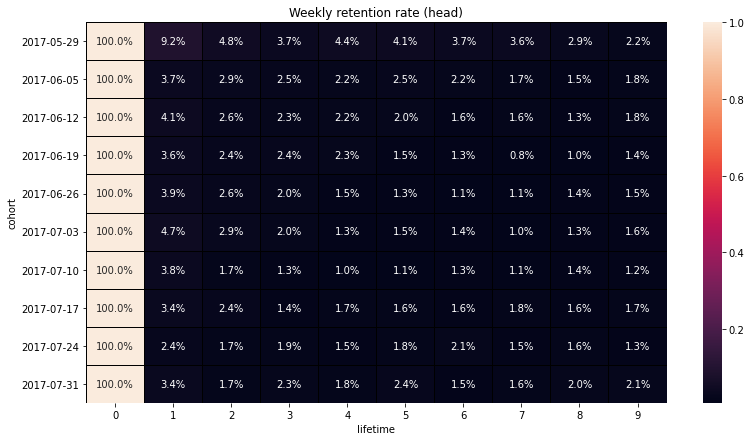

In [51]:
plt.title('Weekly retention rate (head)')
sns.heatmap(
    weekly_retention.iloc[:10,:10],
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='black')
plt.ylabel('cohort')
plt.xlabel('lifetime')
plt.show();

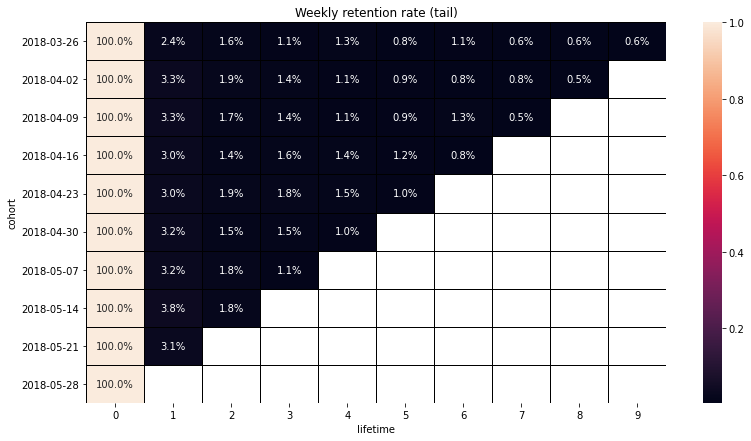

In [52]:
plt.title('Weekly retention rate (tail)')
sns.heatmap(
    weekly_retention.iloc[-10:,:10],
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='black')
plt.ylabel('cohort')
plt.xlabel('lifetime')
plt.show();

Weekly retention rate is decreasing in general.  
It drops sharply after the first week of usage (to 3% on average),  
and eventually decreases further to 1-2%.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Weekly retention give us too big numbers. But it is good that wу check it!
</div>

#### Monthly retention
***
[up](#Retention)

In [53]:
visits_data.sample()

,uid,session_date,first_session_date,session_week,first_session_week
293024,6802990250341483456,2017-06-28,2017-06-28,2017-06-26,2017-06-26


In [54]:
visits_data['session_month'] = visits_data['session_date'].astype('datetime64[M]')
visits_data['first_session_month'] = visits_data['first_session_date'].astype('datetime64[M]')

In [55]:
monthly_cohorts = visits_data.copy()
monthly_cohorts['cohort_lifetime'] = (
    (monthly_cohorts['session_month'] - monthly_cohorts['first_session_month'])
    / np.timedelta64(1, 'M')
).round().astype('int')

monthly_cohorts.sample()

,uid,session_date,first_session_date,session_week,first_session_week,session_month,first_session_month,cohort_lifetime
107946,10403169074343195591,2018-02-05,2017-11-23,2018-02-05,2017-11-20,2018-02-01,2017-11-01,3


In [56]:
monthly_cohorts = (monthly_cohorts
                  .groupby(['first_session_month', 'cohort_lifetime'])
                  .agg({'uid': 'nunique'})
                  .rename(columns={'uid': 'users'})
                  .reset_index())

monthly_cohorts.sample()

,first_session_month,cohort_lifetime,users
37,2017-09-01,4,658


In [57]:
monthly_initial_users = (monthly_cohorts.query('cohort_lifetime == 0')
                        [['first_session_month', 'users']]
                       .rename(columns={'users': 'initial_users'}))
monthly_cohorts = monthly_cohorts.merge(monthly_initial_users, on='first_session_month')

monthly_cohorts.sample()

,first_session_month,cohort_lifetime,users,initial_users
55,2017-11-01,5,638,27248


In [58]:
monthly_cohorts['retention'] = monthly_cohorts['users'] / monthly_cohorts['initial_users']
monthly_cohorts.sample()

,first_session_month,cohort_lifetime,users,initial_users,retention
5,2017-06-01,5,947,13259,0.071423


In [59]:
monthly_retention = monthly_cohorts.pivot_table(
    index='first_session_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')
monthly_retention.index = monthly_retention.index.strftime('%Y-%m-%d')

In [60]:
monthly_retention.cumsum(axis=1).loc[:, 1:].mean(axis=1).rename('retention').to_frame()[:-1]

,retention
first_session_month,
2017-06-01,1.377006
2017-07-01,1.277930
2017-08-01,1.277849
2017-09-01,1.249955
2017-10-01,1.193611
2017-11-01,1.169132
2017-12-01,1.116772
2018-01-01,1.106767
2018-02-01,1.080747


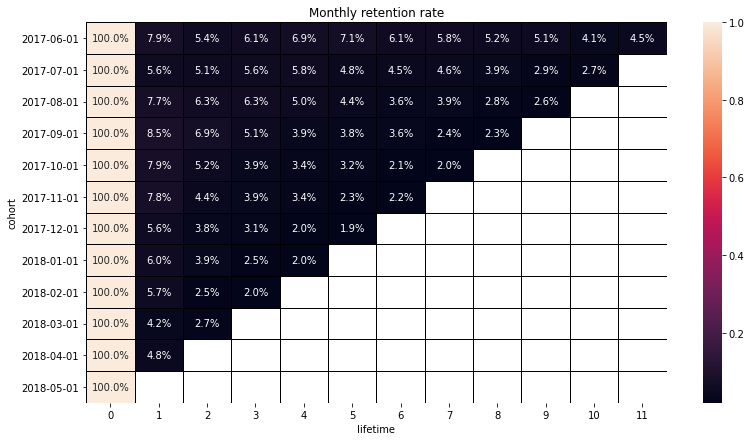

In [61]:
plt.title('Monthly retention rate')
sns.heatmap(
    monthly_retention,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='black')
plt.ylabel('cohort')
plt.xlabel('lifetime')
plt.show();

Monthly retention rate is decreasing in general.  
It is decreasing for all the cohorts with each passing month,  
and at a faster rate for new cohorts.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done! Monthly retention is a great choice!
    
Our retention not so good unfortunately.But it is not negative. Great! :) 

</div>

### Sales
***
[up](#Metrics)

- [Conversion cohorts](#Conversion-cohorts)  
  [Days resolution](#Conversion-cohorts---days-resolution)  
  [Minutes resolution](#Conversion-cohorts---minutes-resolution)
- [Sales cohorts](#Sales-cohorts)
- [Average purchase price](#Average-purchase-price)
- [LTV - lifetime value](#LTV---lifetime-value)

#### Conversion cohorts
***
[up](#Sales)

In [62]:
samples()

visits,device,end_ts,ad_source_id,start_ts,uid,session_date,session_month,session_week
319539,desktop,2018-03-17 21:51:00,3,2018-03-17 21:46:00,12233453312700263522,2018-03-17,2018-03-01,2018-03-12


orders,buy_ts,revenue,uid
23468,2017-12-11 22:39:00,3.05,2304326182273444906


costs,source_id,date,costs
904,3,2017-11-26,579.39


In [63]:
data = (orders
          .join(
              orders.groupby(['uid'])['buy_ts'].min().rename('first_buy_ts'),
              on='uid')
          .join(
              visits.groupby(['uid'])['start_ts'].min().rename('first_session_ts'),
              on='uid'))

data.sample(1)

,buy_ts,revenue,uid,first_buy_ts,first_session_ts
31464,2018-01-28 16:04:00,0.98,4090317183849251053,2018-01-28 16:04:00,2018-01-28 16:02:00


#### Conversion cohorts - days resolution
***
[up](#Sales)

In [64]:
conversion_cohorts = data[['uid']].copy().drop_duplicates()
conversion_cohorts['conversion_days'] = (
    data['first_buy_ts']
  - data['first_session_ts']
).dt.round('d')

conversion_cohorts.sample(3)

,uid,conversion_days
21041,4943780851536217340,0 days
31978,14700748808241859445,5 days
29206,9596523461215341442,0 days


In [65]:
conversion_cohorts_days = pd.concat([
    conversion_cohorts['conversion_days'].value_counts().rename('count'),
    conversion_cohorts['conversion_days'].value_counts(normalize=True).round(3).rename('ratio')
], axis=1)

conversion_cohorts_days.head(1)

,count,ratio
0 days,25216,0.69


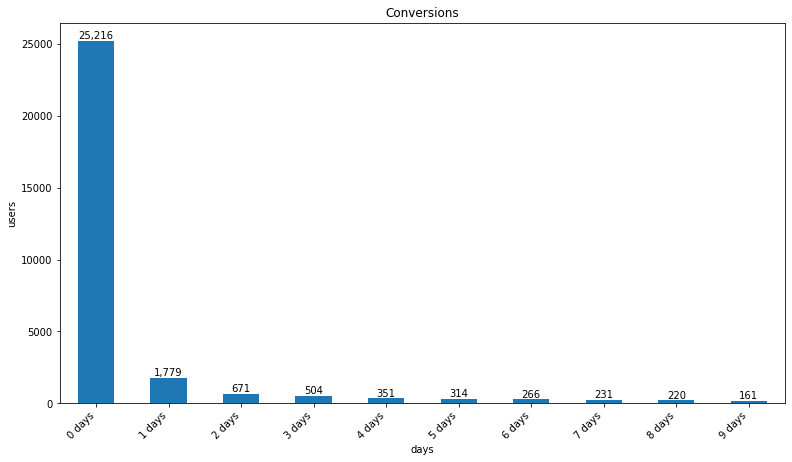

In [66]:
ax = conversion_cohorts_days['count'][:10].plot(kind='bar', title='Conversions')
ax.set_xticklabels(conversion_cohorts_days[:10].index.format(), rotation=45, ha='right')
plot_bar_values(ax)
plt.xlabel('days')
plt.ylabel('users')
plt.show();

Most (69%) users make a purchase within the first day of registration.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Yes, most of people start to buy in first day.</div>

#### Conversion cohorts - minutes resolution
***
[up](#Sales)

In [67]:
conversion_cohorts['conversion_minutes'] = (
    data['first_buy_ts']
  - data['first_session_ts']
).dt.seconds / 60

conversion_cohorts.sample(3)

,uid,conversion_days,conversion_minutes
25879,18053263582696132166,1 days,828.0
42777,9396936220993379928,1 days,35.0
18603,16672011417301699328,0 days,13.0


In [68]:
conversion_cohorts_minutes = pd.concat([
    conversion_cohorts['conversion_minutes'].value_counts().rename('count'),
    conversion_cohorts['conversion_minutes'].value_counts(normalize=True).round(3).rename('ratio')
], axis=1)

conversion_cohorts_minutes.head(1)

,count,ratio
1.0,2669,0.073


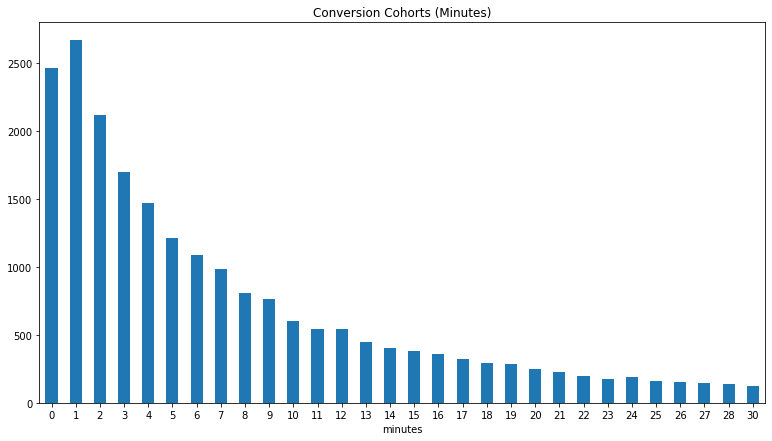

In [69]:
conversion_cohorts_minutes['count'][:30].sort_index().plot.bar() \
  .set_xticklabels(conversion_cohorts_minutes['count'][:30].sort_index().index.astype('int'), rotation=0)
plt.title('Conversion Cohorts (Minutes)')
plt.xlabel('minutes')
plt.show();

Most (7.3%) users take a minute before their first purchase.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for so detailed research about when do people start buying!
</div>



#### Sales cohorts
***
[up](#Sales)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
As you see, we have strange heatmap here. Let's change code a little.

We need a table where orders would be groupby on uid and buy_ts would be minimum. Here we should create column for first order month.
    
After that we should:
    
- find the number of customers in each cohort 
- merge orders and table where orders is groupby on uid and buy_ts is minimum
- groupby on first_order_month and order_month, and count revenue
- calculate lifetime(age)
- merge tables previuos table with the number of customers on first_order_month
- calculate orders per buyer
- create table and heatmap
    
    
Try to use my instruction for your code. I hope it will help! :)
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    The problem was due to me calculating each month's unique visitors, instead of each cohort. fixed.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Well done!</div>

In [70]:
orders.sample()

,buy_ts,revenue,uid
41608,2018-03-25 00:07:00,1.83,9047771365344177000


In [71]:
first_order_month = (orders
                      .groupby('uid')
                      .agg({'buy_ts': 'min'})
                      .rename(columns={'buy_ts': 'first_order_month'}))
first_order_month['first_order_month'] = first_order_month.astype('datetime64[M]')
first_order_month.sample()

,first_order_month
uid,
18154916113715686791,2017-09-01


In [72]:
cohort_users = (first_order_month.reset_index()
                .groupby('first_order_month')
                .agg({'uid': 'nunique'})
                .rename(columns={'uid': 'users'}))
cohort_users.head(2)

,users
first_order_month,
2017-06-01,2023
2017-07-01,1923


In [73]:
cohorts = orders.merge(first_order_month, on='uid')
cohorts['order_month'] = cohorts['buy_ts'].astype('datetime64[M]')
cohorts.head()

,buy_ts,revenue,uid,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [74]:
cohorts = (cohorts
           .groupby(['first_order_month', 'order_month'])
           .agg({'revenue': 'sum', 'buy_ts': 'count'})
           .rename(columns={'buy_ts': 'orders'})
           .reset_index())

cohorts = cohorts.merge(cohort_users, on='first_order_month')

cohorts['cohort_lifetime'] = (
    (cohorts['order_month'] - cohorts['first_order_month'])
    / np.timedelta64(1, 'M')).round().astype('int')

cohorts['orders_per_user'] = (
    cohorts['orders'] 
    / cohorts['users'])

cohorts.head(2)

,first_order_month,order_month,revenue,orders,users,cohort_lifetime,orders_per_user
0,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618
1,2017-06-01,2017-07-01,981.82,177,2023,1,0.087494


In [75]:
orders_volume = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='orders',
    aggfunc='sum')
orders_volume.index = orders_volume.index.strftime('%b %Y')
orders_volume.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
Jun 2017,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
Jul 2017,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
Aug 2017,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
Sep 2017,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
Oct 2017,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
Nov 2017,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
Dec 2017,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
Jan 2018,3783.0,224.0,159.0,64.0,78.0,,,,,,,
Feb 2018,4095.0,222.0,83.0,70.0,,,,,,,,


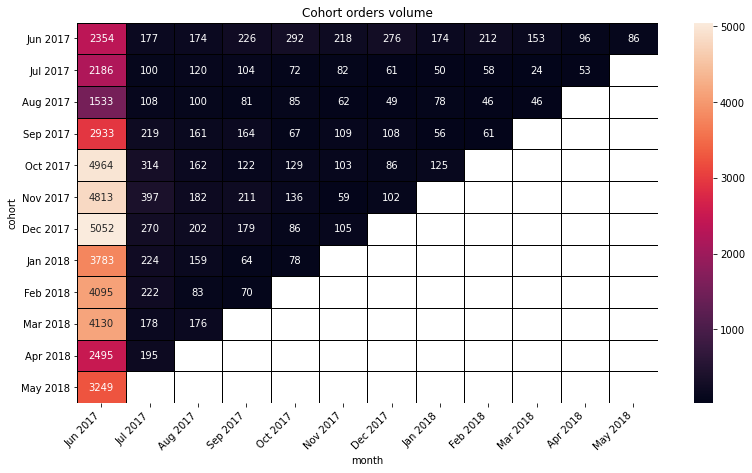

In [76]:
plt.title('Cohort orders volume')
sns.heatmap(
    orders_volume,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black',
    xticklabels=orders_volume.index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('month')
plt.ylabel('cohort')
plt.show();

There are a lot of orders in the first month of usage, and then a sharp drop both in orders and unique users visits.  
Oct, Nov and Dec 2017 cohorts are above average, and so is the first cohort of June 2017.

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Well done! Now we have cohort orders volume
</div>


<div class="alert alert-block alert-danger">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Let's calculate "How many orders do one unique client make during a given period of time".It will be very small number and it help us to make disappointing conclusions.
    
Do not forget cumsum and round, please. :) 
    
    
    
</div>


<div class="alert alert-block alert-info">
    <b>Student answer v.2</b> <a class="tocSkip"></a> <br />
    I have calculated it on last submission, just forgot to display. update below.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.3.</b> <a class="tocSkip"></a>
    
Yep! 1 order per user. On the one hand, this is not enough. On the other hand, we sell tickets and this is very good.:) </div>

In [77]:
avg_orders_per_user = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='orders_per_user',
    aggfunc='mean').cumsum(axis=1).round(2)
avg_orders_per_user.index = avg_orders_per_user.index.strftime('%b %Y')
avg_orders_per_user.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
Jun 2017,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
Jul 2017,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
Aug 2017,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
Sep 2017,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
Oct 2017,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
Nov 2017,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
Dec 2017,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
Jan 2018,1.12,1.19,1.24,1.25,1.28,,,,,,,
Feb 2018,1.12,1.18,1.21,1.22,,,,,,,,


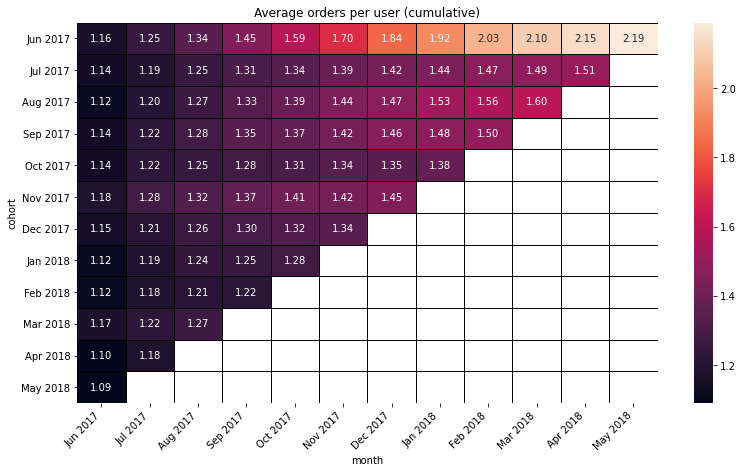

In [78]:
plt.title('Average orders per user (cumulative)')
sns.heatmap(
    avg_orders_per_user,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    xticklabels=orders_volume.index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('month')
plt.ylabel('cohort')
plt.show();

Jun 2017 stands out, all the other cohorts have similarly slow growth.

#### Average purchase price
***
[up](#Sales)

In [79]:
display(Markdown(f"Average purchase price is {data['revenue'].mean():.2f}"))

Average purchase price is 5.00

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Yes, price is 5!
</div>

#### LTV - lifetime value
***
[up](#Sales)

Gross profit = turnover - prime cost  
Gross margin = gross profit / revenue  
The prime costs of these products is not paid by the service, therefore the gross profit is 100% of the revenue.  
This means that the gross profit is the revenue (profit margin = 1).

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
As you see, we have unreal values. Let's change code a little.

We need a table where orders would be groupby on uid and buy_ts would be minimum. Here we should create column for first order month.
    
After that we should:
    
- find the number of customers in each cohort 
- merge orders and table where orders is groupby on uid and buy_ts is minimum
- groupby on first_order_month and order_month, and sum revenue
- calculate lifetime(age)
- merge tables previuos table with the number of customers on first_order_month
- calculate ltv
- create table and heatmap
    
    
Try to use my instruction for your code. I hope it will help! :)
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    Using the previous cohorts dataframe to continue calculations.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
So, we have problems in previous code. Try to check it. :)
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.2</b> <a class="tocSkip"></a> <br />
    After consulting with the tutors on slack, I have come to understand that the answer was almost correct. <br />
    Only thing that was missing here was cumsum(), which I have now added. <br />
    Update below.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.3.</b> <a class="tocSkip"></a>
    
Very good! </div>

In [80]:
cohorts.sample()

,first_order_month,order_month,revenue,orders,users,cohort_lifetime,orders_per_user
59,2017-12-01,2018-02-01,4054.7,202,4383,2,0.046087


In [81]:
cohorts['ltv'] = cohorts['revenue'] / cohorts['users']
cohorts.head(3)

,first_order_month,order_month,revenue,orders,users,cohort_lifetime,orders_per_user,ltv
0,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414
1,2017-06-01,2017-07-01,981.82,177,2023,1,0.087494,0.485329
2,2017-06-01,2017-08-01,885.34,174,2023,2,0.086011,0.437637


In [82]:
ltv_pivot = cohorts.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='ltv',
    aggfunc='mean').cumsum(axis=1).round(2)
ltv_pivot.index = ltv_pivot.index.strftime('%b %Y')
ltv_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
Jun 2017,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
Jul 2017,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
Aug 2017,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
Sep 2017,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
Oct 2017,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
Nov 2017,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
Dec 2017,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
Jan 2018,4.14,4.43,4.73,4.88,4.94,,,,,,,
Feb 2018,4.16,4.44,4.51,4.59,,,,,,,,


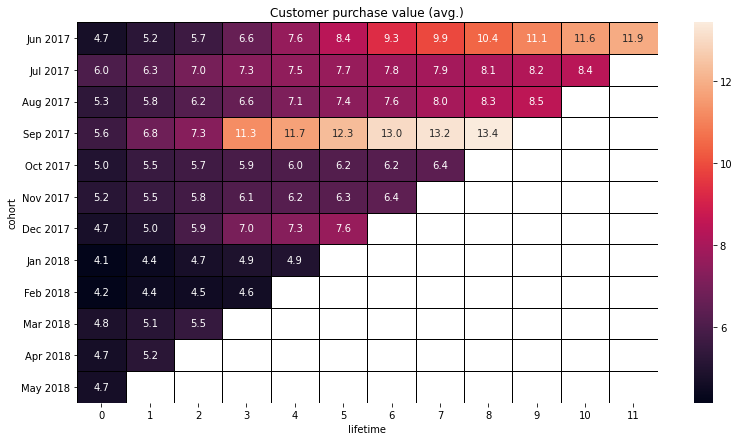

In [83]:
plt.title('Customer purchase value (avg.)')
sns.heatmap(
    ltv_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='black')
plt.xlabel('lifetime')
plt.ylabel('cohort')
plt.show();

The average purchase value (4.0) of September 2017 cohort, at the 3rd lifetime stands out.  
It can be explained by exceptionally big orders from several customers.

In [84]:
ltv_pivot.sum(axis=1).rename('cumulative_ltv').sort_values(ascending=False).to_frame()

,cumulative_ltv
first_order_month,
Jun 2017,102.36
Sep 2017,94.61
Jul 2017,82.22
Aug 2017,70.64
Oct 2017,46.96
Nov 2017,41.44
Dec 2017,37.59
Jan 2018,23.12
Feb 2018,17.70


Over the entire timespan (1 year), Jun 2017 cohort has the highest overall Lifetime Value,  
due to having most lifetimes,  
and on the 2nd place there is the Sep 2017 cohort, probably due to a sharp increase on December and months following.

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.3.</b> <a class="tocSkip"></a>
    
Excellent! Now we can look on LTV by cohorts.

</div>

### Marketing
***
[up](#Metrics)

- [Costs](#Marketing-costs)
- [CAC - customer acquisition cost](#CAC---customer-acquisition-cost)
- [ROI - return on investment](#ROI---return-on-investment)
- [Monthly metrics](#Monthly-metrics)
- [Ad source metrics](#Ad-source-metrics)

<a id="Marketing-costs"></a>
#### Costs
***
[up](#Marketing)

In [85]:
display(Markdown(f"Overall ads cost: {costs['costs'].sum():,.0f}"))

Overall ads cost: 329,132

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Yes!</div>

In [86]:
costs_by_source = costs.groupby('source_id').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
costs_by_source = costs_by_source.append(costs_by_source.sum().rename('All'))
costs_by_source['ratio'] = (costs_by_source['costs'] / costs_by_source.loc['All', 'costs']).round(3)
costs_by_source

,costs,ratio
source_id,,
3,141321.63,0.429
4,61073.60,0.186
5,51757.10,0.157
2,42806.04,0.130
1,20833.27,0.063
10,5822.49,0.018
9,5517.49,0.017
All,329131.62,1.000


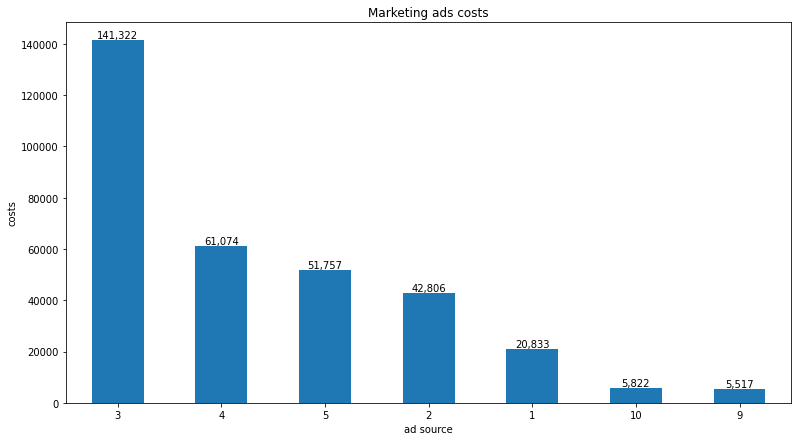

In [87]:
ax = costs_by_source[:-1]['costs'].plot(kind='bar', title='Marketing ads costs')
plt.xticks(rotation=0);
plot_bar_values(ax)
plt.xlabel('ad source')
plt.ylabel('costs')
plt.show()

Ad source #3 has the highest costs, with ~141,300 (43%).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
We spent too much money for 3 sources. Perhaps, it is not normal. We should check it later in ROI.
</div>

In [88]:
costs['month'] = costs['date'].astype('datetime64[M]')

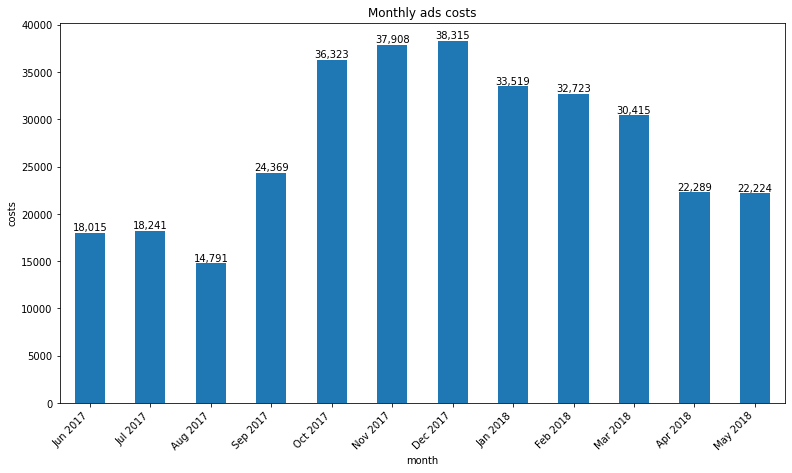

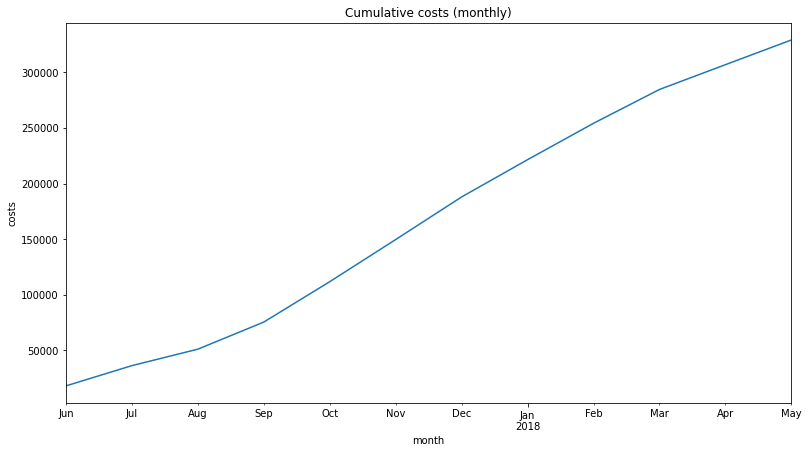

In [89]:
costs_monthly = costs.groupby('month').agg({'costs': 'sum'})

ax = costs_monthly.plot(kind='bar', title='Monthly ads costs', legend='')
ax.set_xticklabels(costs_monthly.index.strftime('%b %Y'), rotation=45, ha='right')
plt.ylabel('costs')
for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:,.0f}', ha='center', va='bottom')

costs_monthly.cumsum().plot(title='Cumulative costs (monthly)', legend='')
plt.xlabel('month')
plt.ylabel('costs')
plt.show();

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Perhaps, plot() would be informative for dynamics. But this graph is great too. We have values on each month!
</div>

#### CAC - customer acquisition cost
***
[up](#Marketing)

In [90]:
samples()

visits,device,end_ts,ad_source_id,start_ts,uid,session_date,session_month,session_week
181149,touch,2017-11-17 19:58:00,2,2017-11-17 19:31:00,15273714129857295034,2017-11-17,2017-11-01,2017-11-13


orders,buy_ts,revenue,uid
26130,2017-12-26 12:24:00,2.32,11635037434094398602


costs,source_id,date,costs,month
1836,9,2017-06-21,6.81,2017-06-01


data,buy_ts,revenue,uid,first_buy_ts,first_session_ts
47324,2018-05-15 13:24:00,4.67,33589118145270544,2018-05-15 13:24:00,2018-05-15 12:48:00


cohorts,first_order_month,order_month,revenue,orders,users,cohort_lifetime,orders_per_user,ltv
64,2018-01-01,2018-02-01,994.22,224,3373,1,0.06641,0.294758


In [91]:
costs_by_ad_source = (costs
                 .groupby(['source_id', 'month'])
                 .agg({'costs': 'sum'})
                 .reset_index())
costs_by_ad_source.head(3)

,source_id,month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81


In [92]:
cac_report = cohorts.merge(
    costs_by_ad_source.rename(columns={'month': 'first_order_month'}),
    on='first_order_month')
cac_report.head()

,first_order_month,order_month,revenue,orders,users,cohort_lifetime,orders_per_user,ltv,source_id,costs
0,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,1,1125.61
1,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,2,2427.38
2,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,3,7731.65
3,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,4,3514.80
4,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,5,2616.12


In [93]:
cac_report['cac'] = cac_report['costs'] / cac_report['users']
cac_report.head(3)

,first_order_month,order_month,revenue,orders,users,cohort_lifetime,orders_per_user,ltv,source_id,costs,cac
0,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,1,1125.61,0.556406
1,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,2,2427.38,1.199891
2,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,3,7731.65,3.821873


In [94]:
cac_by_source = cac_report.groupby(['source_id']).agg({'cac': 'sum'}).sort_values(by='cac', ascending=False)
cac_by_source

,cac
source_id,
3,309.730341
4,139.473671
5,113.230671
2,93.956107
1,45.587828
10,12.816800
9,12.157186


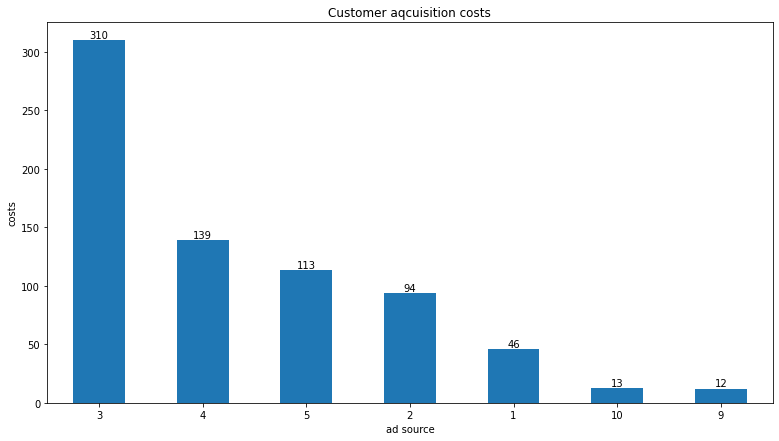

In [95]:
ax = cac_by_source.plot(kind='bar', title='Customer aqcuisition costs', legend='')
plot_bar_values(ax)
plt.xticks(rotation=0)
plt.xlabel('ad source')
plt.ylabel('costs')
plt.show();

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
 
Too much money to 3 source! Not good idea for marketing.
</div>

#### ROI - return on investment
***
[up](#Marketing)

In [96]:
costs_by_month = costs.groupby('month').agg({'costs': 'sum'}).reset_index()
costs_by_month

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [97]:
romi_report = cohorts.merge(costs_by_month.rename(columns={'month': 'first_order_month'}), on='first_order_month')
romi_report.head(3)

,first_order_month,order_month,revenue,orders,users,cohort_lifetime,orders_per_user,ltv,costs
0,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,18015.0
1,2017-06-01,2017-07-01,981.82,177,2023,1,0.087494,0.485329,18015.0
2,2017-06-01,2017-08-01,885.34,174,2023,2,0.086011,0.437637,18015.0


In [98]:
romi_report.groupby('first_order_month').agg({'ltv': 'sum', 'costs': 'mean'})

,ltv,costs
first_order_month,,
2017-06-01,11.879234,18015.00
2017-07-01,8.386854,18240.59
2017-08-01,8.471723,14790.54
2017-09-01,13.435227,24368.91
2017-10-01,6.360242,36322.88
2017-11-01,6.395244,37907.88
2017-12-01,7.639913,38315.35
2018-01-01,4.940151,33518.52
2018-02-01,4.587921,32723.03


In [99]:
romi_report['cac'] = romi_report['costs'] / romi_report['users']
romi_report['romi'] = romi_report['ltv'] / romi_report['cac']
romi_report.head(3)

,first_order_month,order_month,revenue,orders,users,cohort_lifetime,orders_per_user,ltv,costs,cac,romi
0,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.724414,18015.0,8.905091,0.530530
1,2017-06-01,2017-07-01,981.82,177,2023,1,0.087494,0.485329,18015.0,8.905091,0.054500
2,2017-06-01,2017-08-01,885.34,174,2023,2,0.086011,0.437637,18015.0,8.905091,0.049145


In [100]:
romi_pivot = romi_report.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='romi',
    aggfunc='mean')

romi_cumsum = romi_pivot.cumsum(axis=1).round(2)
romi_cumsum.index = romi_cumsum.index.strftime('%Y-%m')

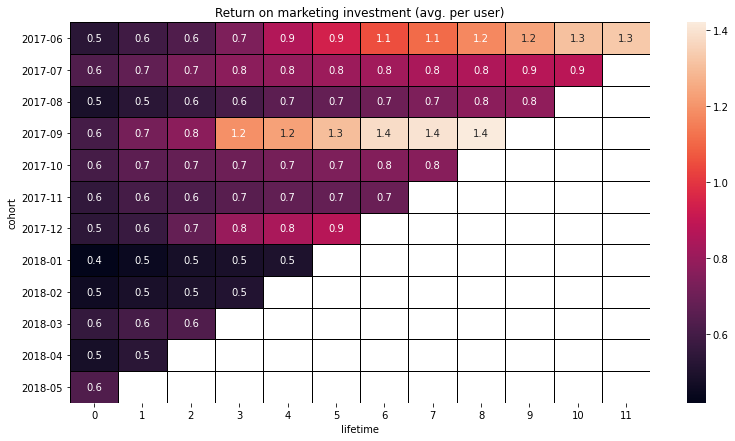

In [101]:
plt.title('Return on marketing investment (avg. per user)')
sns.heatmap(
    romi_cumsum,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='black')
plt.xlabel('lifetime')
plt.ylabel('cohort')
plt.show();

The following cohorts have paid off fastest:
- Sep 2017, profitable by 3rd lifetime
- Jun 2017, profitable by 6th lifetime

In [102]:
romi_cumsum.mean(axis=0).rename('ROMI cumulative').to_frame()

,ROMI cumulative
cohort_lifetime,
0,0.540833
1,0.582727
2,0.629000
3,0.717778
4,0.783750
5,0.860000
6,0.898333
7,0.970000
8,1.052500


It takes 9 lifetimes on average for a cohort to become profitable.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Well done! Now we know Roi and it is not pleases us. But who said that the result will always be good.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~Could you show ROI by cohorts? Such dynamics help us to define a problem.~
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    Update below.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>
    
Our ROI not so big on cohorts. Our sources have bad prospects. But we have job for marketing deparment. :)
</div>

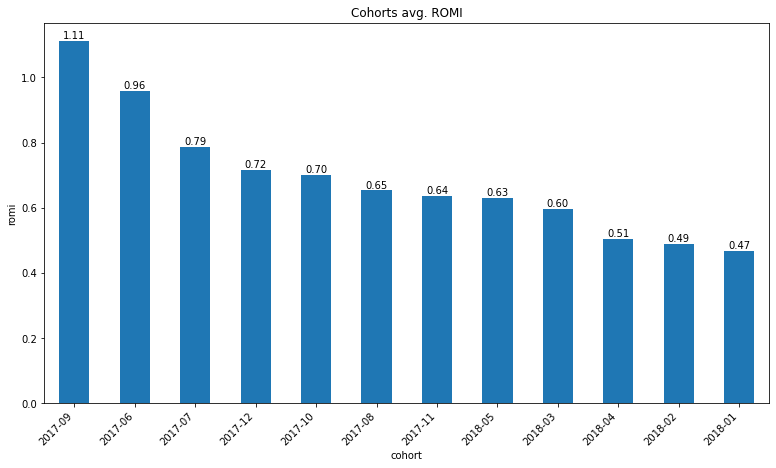

In [103]:
ax = romi_cumsum.mean(axis=1).sort_values(ascending=False).rename('ROMI').to_frame().plot(kind='bar', legend='')
plot_bar_values(ax, lambda h:f'{h:,.2f}')
plt.title('Cohorts avg. ROMI')
plt.xticks(rotation=45, ha='right')
plt.xlabel('cohort')
plt.ylabel('romi')
plt.show();

Sep 2018 and Jun 2017 are at the top, while Feb and Jan 2018 struggle behind.

#### Monthly metrics
***
[up](#Marketing)

In [104]:
roi_report = (romi_report
              .groupby('first_order_month')
              .agg({'users': 'sum', 'ltv': 'sum', 'costs': 'mean'})
              .reset_index())
roi_report['cac'] = roi_report['costs'] / roi_report['users']
roi_report['roi'] = roi_report['ltv'] / roi_report['cac']
roi_report

,first_order_month,users,ltv,costs,cac,roi
0,2017-06-01,24276,11.879234,18015.00,0.742091,16.007787
1,2017-07-01,21153,8.386854,18240.59,0.862317,9.725953
2,2017-08-01,13700,8.471723,14790.54,1.079601,7.847083
3,2017-09-01,23229,13.435227,24368.91,1.049073,12.806764
4,2017-10-01,34720,6.360242,36322.88,1.046166,6.079573
5,2017-11-01,28567,6.395244,37907.88,1.326981,4.819392
6,2017-12-01,26298,7.639913,38315.35,1.456968,5.243706
7,2018-01-01,16865,4.940151,33518.52,1.987460,2.485660
8,2018-02-01,14604,4.587921,32723.03,2.240690,2.047549
9,2018-03-01,10599,5.455253,30415.27,2.869636,1.901026


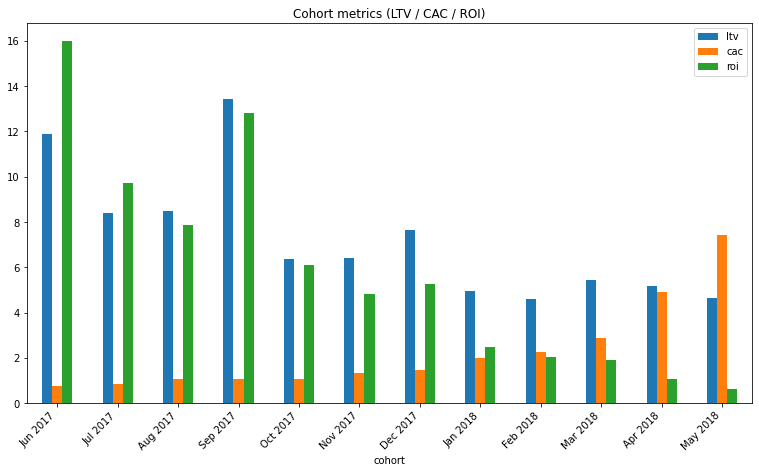

In [105]:
(roi_report
 .groupby('first_order_month').sum()
 [['ltv', 'cac', 'roi']]
 .reset_index()
 .plot(kind='bar', x='first_order_month', title='Cohort metrics (LTV / CAC / ROI)'))
plt.xticks(range(12), labels=roi_report['first_order_month'].dt.strftime('%b %Y'), rotation=45, ha='right')
plt.xlabel('cohort')
plt.show();

Overall, Jun 2017, Sep 2017, Jul 2017 and Aug 2017 seem to be the most profitable cohorts.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
    
Well done! Now we know Roi and can compare it with other metrics.Great graph! Perhaps values will be different.
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    New results are in! :)
</div>

#### Ad source metrics
***
[up](#Marketing)

In [106]:
samples()

visits,device,end_ts,ad_source_id,start_ts,uid,session_date,session_month,session_week
340677,desktop,2018-01-16 16:20:00,1,2018-01-16 16:11:00,7306981182385040911,2018-01-16,2018-01-01,2018-01-15


orders,buy_ts,revenue,uid
46289,2018-05-04 10:08:00,3.67,14360900736315422831


costs,source_id,date,costs,month
2432,10,2018-02-09,17.42,2018-02-01


data,buy_ts,revenue,uid,first_buy_ts,first_session_ts
7934,2017-09-15 23:45:00,0.92,10478802796828998103,2017-07-03 15:51:00,2017-07-03 15:51:00


cohorts,first_order_month,order_month,revenue,orders,users,cohort_lifetime,orders_per_user,ltv
70,2018-02-01,2018-04-01,286.66,83,3651,2,0.022733,0.078515


In [112]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359398 non-null  category      
 1   end_ts         359398 non-null  datetime64[ns]
 2   ad_source_id   359398 non-null  int64         
 3   start_ts       359398 non-null  datetime64[ns]
 4   uid            359398 non-null  uint64        
 5   session_date   359398 non-null  datetime64[ns]
 6   session_month  359398 non-null  datetime64[ns]
 7   session_week   359398 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), int64(1), uint64(1)
memory usage: 22.3 MB


In [116]:
%%time
user_source = visits.sort_values('session_date').groupby('uid').first()['ad_source_id'].reset_index()

CPU times: user 8.26 s, sys: 4.14 ms, total: 8.26 s
Wall time: 8.6 s


In [114]:
# user_source = visits.sort_values('session_date').groupby('uid').first()['ad_source_id'].reset_index()
user_source.sample()

,uid,ad_source_id
69457,5607033583131820832,5


<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    Above line takes a lot of time to execute (relatively, above 15 seconds). <br />
    Any ideas how to optimize?
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Where do you run the code? On your computer or here? Because here it is instantly.
    
For optimize we should rename separately. Try. :)

<div class="alert alert-block alert-info">
    <b>Student answer v.2</b> <a class="tocSkip"></a> <br />
    I have actually meant the line above it, where there is %%time magic. <br />
    I did not understand your suggesion, sorry. please explain further.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Sorry, I thought thatyou mean costs_by_source.
    
For user_source you can use this code: 
    
    user_source = visits.sort_values('session_date').groupby('uid').agg({'ad_source_id':'first'}).reset_index()
    
On our server time is 129ms. :)

In [109]:
costs_by_source = (costs
                   .rename(columns={'source_id': 'ad_source_id'})
                   .groupby('ad_source_id')
                   .agg({'costs': 'sum'})
                   .rename(columns={'costs': 'marketing_costs'}))

In [110]:
sources = (orders
           .merge(user_source, on='uid')
           .groupby('ad_source_id')
           .agg({'uid': 'nunique', 'revenue': 'sum'})
           .rename(columns={'uid': 'buyers'})
           .reset_index())
sources = sources.merge(costs_by_source, on='ad_source_id')
sources['ltv'] = sources['revenue'] / sources['buyers']
sources['cac'] = sources['marketing_costs'] / sources['buyers']
sources['romi'] = sources['ltv'] / sources['cac']
sources

,ad_source_id,buyers,revenue,marketing_costs,ltv,cac,romi
0,1,3354,37477.53,20833.27,11.173980,6.211470,1.798927
1,2,3567,44554.13,42806.04,12.490645,12.000572,1.040837
2,3,10111,51655.44,141321.63,5.108836,13.977018,0.365517
3,4,10018,55148.26,61073.60,5.504917,6.096387,0.902980
4,5,7109,53146.22,51757.10,7.475907,7.280504,1.026839
5,9,1057,5536.26,5517.49,5.237711,5.219953,1.003402
6,10,1305,4534.72,5822.49,3.474881,4.461678,0.778828


,ltv,cac,romi
ad_source_id,,,
1,11.173980,6.211470,1.798927
2,12.490645,12.000572,1.040837
5,7.475907,7.280504,1.026839
9,5.237711,5.219953,1.003402
4,5.504917,6.096387,0.902980
10,3.474881,4.461678,0.778828
3,5.108836,13.977018,0.365517


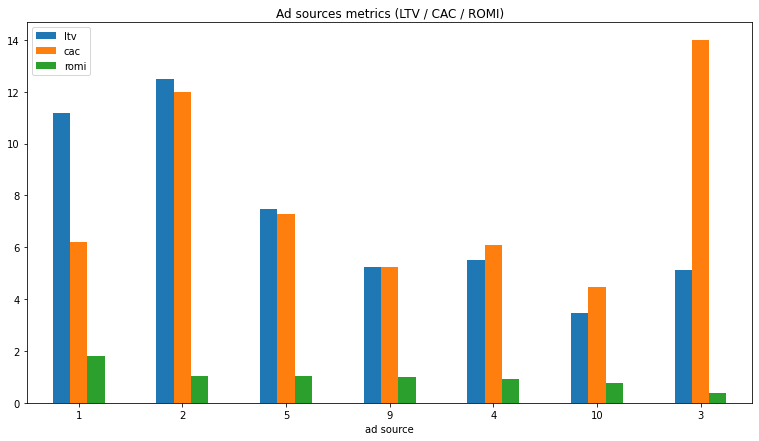

In [111]:
source_metrics = sources.groupby('ad_source_id').agg({
    'ltv': 'sum',
    'cac': 'sum',
    'romi': 'sum'}).sort_values(by='romi', ascending=False)
display(source_metrics)

source_metrics.plot.bar(title='Ad sources metrics (LTV / CAC / ROMI)')
plt.xticks(rotation=0)
plt.xlabel('ad source')
plt.show();

Ad sources #1 and #2 have the highest ROMI values, while #3 is doing worst.  
Ad source #10 has the lowest LTV value overall.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for ROMI! 3 source is too high! Perhaps, values will be different.
</div>

<div class="alert alert-block alert-info">
    <b>Student answer v.1</b> <a class="tocSkip"></a> <br />
    I did not get different results here. should have I?
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Strange LTV for 10 source. On the heatmap it has many empty monthes.But here it not so bad. :)  
    
</div>

## Insights
***
[back](#Table-of-Contents)

* Retention rates drop sharply after the first lifetime.  
    Consider strategies to engage registered users, perhaps offer promotions or discounts.
    

* Jun-Oct 2017 and Apr-May 2018 have below average daily users, with a sharp drop just before April 18'.  
    These months should be given extra attention.
    
    
* Average session length is 1 minute long, that is the time we have for conversion.
    
    
* Oct, Nov and Dec 2017 had highest purchase sums


* Sep 2017 cohort had a huge peak of large sum orders
* Sep 2017 and Jun 2017 cohort's ROI transitioned into profitability by December 2017,  
    which seem to justify the large marketing costs of the last few months of 2017.


* Jun 2017 and Sep 2017 are the most successful cohorts (based on LTV, CAC and ROI),  
    with Jul 2017 and Aug 2017 cohorts not too far behind.  
    Check which marketing strategies were used in those time periods, and re-apply.


* Ditch Ad source #3:  
    Customer acquisition cost is huge compared to others, and the Return on investment is very low.  
    Invest more in ad sources #1 and #2, which perform very well.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Excellent conclusion! You describe all steps here. Very good!

</div>
